# Visualizer for Data Augmentation

## Import libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils

from toolkit import mnist_to_nparray
from preprocessing import Augmentor

C:\Users\miche\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Pick a sample

In [2]:
DATA_FOLDER = '../Joan/data/'
X_train, y_train, X_test = mnist_to_nparray(DATA_FOLDER)

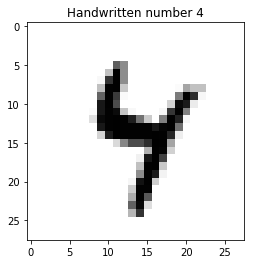

In [3]:
sample_idx = random.randint(0, X_train.shape[0])
sample = X_train[sample_idx]
label = y_train[sample_idx]
plt.imshow(sample.reshape((28,28)), cmap='Greys', interpolation='nearest')
plt.title('Handwritten number {0}'.format(label))
plt.show()

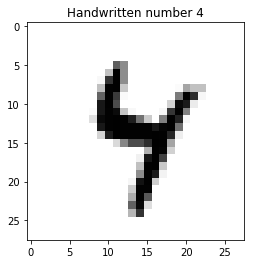

In [4]:
#  mock a set
train_data = np.array([np.array(sample)])
target = np.array([label])

# reshape
train_data = train_data.reshape(train_data.shape[0], 1, 28, 28).astype('float32')
target = np_utils.to_categorical(target)

# show it again
plt.imshow(train_data[0][0], cmap='Greys', interpolation='nearest')
plt.title('Handwritten number {0}'.format(label))
plt.show()

## Data augmentation

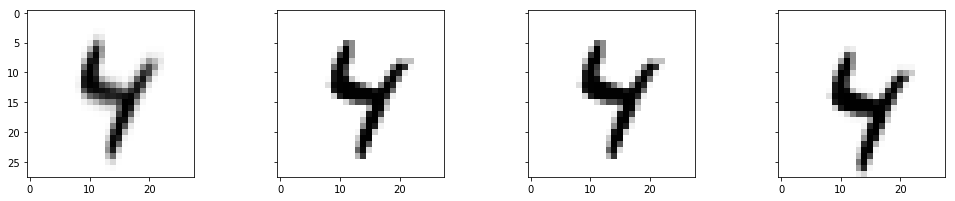

In [22]:
# use the method to do all operations at once
augmentor = Augmentor(train_data, target)
dataset, _ = augmentor.augment()

f, axis = plt.subplots(1, len(dataset), figsize=(15, 15), sharey=True)
for i, image in enumerate(dataset):
    axis[i].imshow(image[0], cmap='Greys', interpolation='nearest')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)
plt.show()